In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data

df=pd.read_csv("/content/drive/MyDrive/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6104,7356-AYNJP,Female,0,No,No,4,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,23.9,97.5,No
1814,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.7,258.35,No
1142,2460-NGXBJ,Male,1,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.2,775.3,No
6506,5889-LFOLL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.6,1115.2,Yes
3848,8805-JNRAZ,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.2,103.7,No


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
# First of all drop customerID column as it is of no use

df.drop('customerID',axis='columns',inplace=True)


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
# remove rows with space in TotalCharges

df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


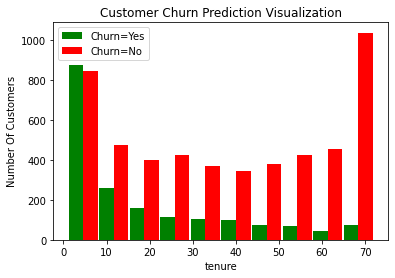

In [19]:
# Data Visualization

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men=[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women=[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([tenure_churn_yes,tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

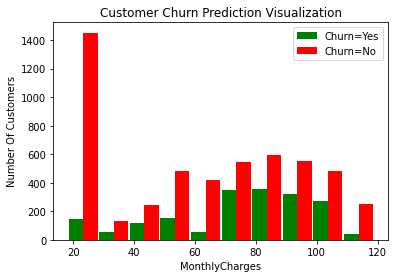

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men=[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women=[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
# many of the columns are yes, no,etc. Let's print unique values in object columns to see data values

def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
# some of the columns have no internet serviceor no phone service , that can be replaced with a simple No

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
# convert yes and no to 1 or 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0])

In [29]:
# One hot encoding for categorical columns

df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
984,1,0,1,1,72,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3880,0,0,1,1,26,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3230,0,0,1,1,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5902,1,0,1,0,9,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3131,1,1,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
# train test split

X = df2.drop('Churn',axis='columns')
y = testLabels=df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
5163/1869

2.7624398073836276

In [38]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5795,0,0,0,0,0.535211,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
1175,1,0,0,0,0.169014,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
6631,0,0,1,0,0.338028,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3157,0,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6881,1,0,1,1,0.436620,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
3487,1,0,1,1,0.718310,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4934,1,0,1,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
510,0,1,1,1,0.267606,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
202,0,0,1,1,0.985915,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2083,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [42]:
# Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
  model = keras.Sequential([
                          keras.layers.Dense(26, input_shape=(26,), activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  if weights == -1:
    model.fit(X_train,y_train, epochs=100)
  else:
    model.fit(X_train,y_train, epochs=100, class_weight=weights)

  print(model.evaluate(X_test,y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("classification report: \n", classification_report(y_test,y_preds))

  return y_preds



 

In [44]:
y_preds= ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7273
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7856
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accura

### **MITIGATING SKEWDNESS OF DATA**

In [45]:
# method 1: undersampling
# class count
# class1 include 1033 samples and 0 class include 374 samples so there is data imbalance


count_class_0,count_class_1 = df1.Churn.value_counts()

# divide by class

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [46]:
# undersample 0-class and concat the Dataframes of both class


df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print("Random under- sampling:")
print(df_test_under.Churn.value_counts())

Random under- sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

# stratify used too balanced samples

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [48]:
# num.of classes in training data

y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
# print classification in last,scroll down till the last epoch to watch the classification report
y_preds= ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6254 - accuracy: 0.6599
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7649
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7709
Epoch 11/

check classification report above f1-score for minority class 1 improved from 0.58 to 0.75  score for class o reduced to 0.72 from 0.85 but that's ok. we have more generalized classifier which classifies both classes with similar prediction score

In [50]:
# Method2 = oversampling
# oversample 1-class and concat the dataframes of both clases

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)

print("Random over- sampling:")
print(df_test_over.Churn.value_counts())

Random over- sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [51]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [52]:
# num.of classes in training data

y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [53]:
loss=keras.losses.BinaryCrossentropy()
weights=-1
y_preds= ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7310
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.7608
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7637
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7676
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7691
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7696
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7718
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7746
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7772
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4648 - accura

In [54]:
# methode  smote
# to install imbalanced learn library use pip install imbalanced-learn command

In [55]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [56]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [58]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [59]:
y_preds= ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7680
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8034
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8076
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accura

smote oversampling increases f1 score of minority class 1 from 0.58 to 0.81 (huge improvement) also over all accuracy imporoves from 0.78 to 0.81

In [60]:
# method4: use of ensemble with undersampling

In [61]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [63]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 -- class1(1495)+class0(0,1495)

model2 -- class1(1495)+class0(1496,2990)

model3 -- class1(1495)+class0(2990,4130) 

In [64]:
df3=X_train.copy()
df3['Churn']=y_train

In [65]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [66]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [67]:
def get_train_batch(df_majority, df_minority, start,end):
  df_train=pd.concat([df_majority[start:end], df_minority], axis=0)


  X_train=df_train.drop('Churn',axis='columns')
  y_train=df_train.Churn
  return X_train,y_train

In [68]:
X_train, y_train =get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)



Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6112 - accuracy: 0.6766
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7545
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7696
Epoch 11/

In [69]:
X_train, y_train =get_train_batch(df3_class0, df3_class1, 1495,2990)

y_pred2=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.6575
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7672
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7686
Epoch 11/

In [70]:
X_train, y_train =get_train_batch(df3_class0, df3_class1,2990,4130)

y_pred3=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5859 - accuracy: 0.6987
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7628
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7719
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7765
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7723
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7814
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7769
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7825
Epoch 11/

In [71]:
len(y_pred1)

1407

In [72]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [73]:
cl_rep=classification_report(y_test,y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

